In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("covid_19_india.csv")
df = df.filter(items=['Date', 'State/UnionTerritory',
               'Cured', 'Deaths', 'Confirmed'])  # trimming the data we needed
df['Date'] = df['Date'].apply(
    lambda date: date.split('/')[2]+'/'+date.split('/')[1]+'/'+date.split('/')[0])  # DD/MM/YY to YY/MM/DD for comparison

df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,20/01/30,Kerala,0,0,1
1,20/01/31,Kerala,0,0,1
2,20/02/01,Kerala,0,0,2
3,20/02/02,Kerala,0,0,3
4,20/02/03,Kerala,0,0,3
...,...,...,...,...,...
9286,20/12/09,Telengana,266120,1480,275261
9287,20/12/09,Tripura,32169,373,32945
9288,20/12/09,Uttarakhand,72435,1307,79141
9289,20/12/09,Uttar Pradesh,528832,7967,558173


### 5.1

In [4]:
states_five = df.loc[(df['State/UnionTerritory'].isin(['Kerala', 'Odisha', 'Rajasthan', 'Tamil Nadu']))
                     & (df['Date'] < '20/05/27')
                     ].groupby("State/UnionTerritory").sum() - \
    df.loc[(df['State/UnionTerritory'].isin(['Kerala', 'Odisha', 'Rajasthan', 'Tamil Nadu']))
           & (df['Date'] < '20/04/27')
           ].groupby("State/UnionTerritory").sum()

states_five

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Kerala,13855,121,17254
Odisha,5211,93,16257
Rajasthan,66279,3194,127244
Tamil Nadu,93183,1724,238793


### 5.2

In [6]:
top = df.filter(items=['State/UnionTerritory', 'Confirmed']).groupby(
    "State/UnionTerritory").sum().sort_values("Confirmed", ascending=False)

top.head()

,Confirmed
State/UnionTerritory,
Maharashtra,179450627
Andhra Pradesh,84815303
Tamil Nadu,82789540
Karnataka,79354749
Uttar Pradesh,50283822


### 5.3

<AxesSubplot:xlabel='State/UnionTerritory'>

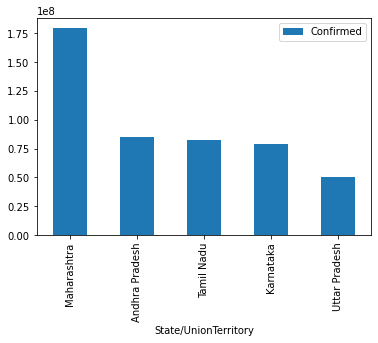

In [8]:
top[:5].plot(kind="bar")